# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Линейная регрессия":

https://clck.ru/32AKdJ

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

Ваша задача:
1. Исследовать данные
2. Построить модель линейной регрессии по своему набору данных
3. Получить коэффиценты уравнения линейной регрессии
4. Написать уравнение линейной регрессии
5. Визуализировать данные и полученное уравнение линейной регрессии
6. Оценивать полученную модель с помощью MSE, MAE, R2.
7. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [27]:
from google.colab import files
uploaded = files.upload()

#df = pd.read_csv("weatherHistory.csv")

KeyboardInterrupt: ignored

In [4]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [8]:
mask = {'rain':0, 'snow':1}
for i in range(len(df['Precip Type'])):
  if df.iloc[i, 2] == 'rain':
    df.iloc[i, 2] = 0
  else:
    df.iloc[i, 2] = 1
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


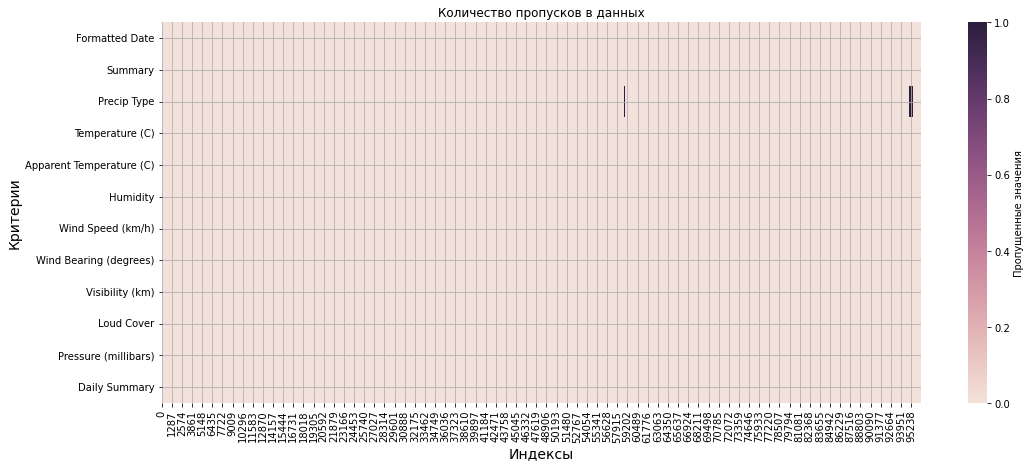

In [ ]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()
     

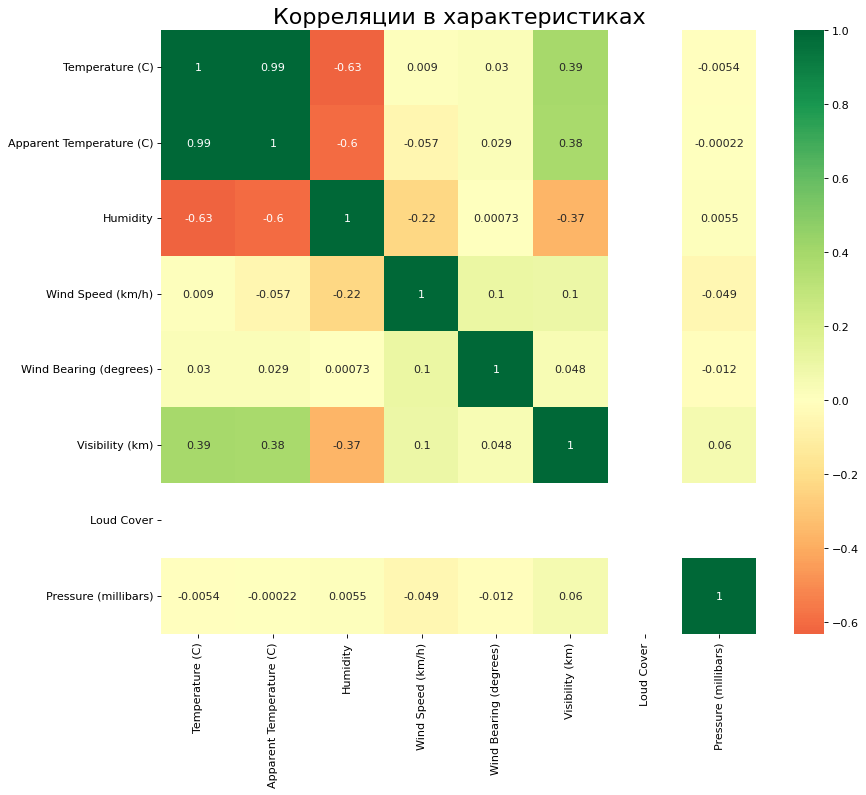

In [ ]:

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [9]:
df = df.drop(columns=['Summary', 'Daily Summary'])
df

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,2016-09-09 20:00:00.000 +0200,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,2016-09-09 21:00:00.000 +0200,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,2016-09-09 22:00:00.000 +0200,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [10]:
df['year'] = 0
df['month'] = 0
df['day'] = 0
df

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),year,month,day
0,2006-04-01 00:00:00.000 +0200,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0,0,0
1,2006-04-01 01:00:00.000 +0200,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0,0,0
2,2006-04-01 02:00:00.000 +0200,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0,0,0
3,2006-04-01 03:00:00.000 +0200,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0,0,0
4,2006-04-01 04:00:00.000 +0200,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,0,0,0
96449,2016-09-09 20:00:00.000 +0200,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,0,0,0
96450,2016-09-09 21:00:00.000 +0200,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,0,0,0
96451,2016-09-09 22:00:00.000 +0200,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,0,0,0


In [15]:
year, month, day = df.iloc[0, 0].split(" ")[0].split('-') 
year

'2006'

In [17]:
df = df.iloc[:2000]

In [18]:
for i in range(len(df['Formatted Date'])):
  year, month, day = df.iloc[0, 0].split(" ")[0].split('-') 
  df.iloc[i, 10] = year
  df.iloc[i, 11] = month
  df.iloc[i, 12] = day

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
df = df.drop(columns = 'Formatted Date')

In [21]:
y = df['Temperature (C)']
x = df.drop(columns='Temperature (C)')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

1.7492023739922757 [-6.25520845e-01  8.73913890e-01 -5.34972556e-01  7.27054053e-02
  5.22623496e-04 -1.16532433e-02  0.00000000e+00  2.07244511e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [24]:
ans = str(w0)
for i in range(8):
  ans = ans + ' + ' + str(w1[i]) + f' * x{i+1}'
print(ans)

1.7492023739922757 + -0.6255208454379493 * x1 + 0.8739138902822972 * x2 + -0.5349725559505853 * x3 + 0.07270540529598217 * x4 + 0.0005226234956816622 * x5 + -0.011653243346398875 * x6 + 0.0 * x7 + 0.0002072445105882892 * x8


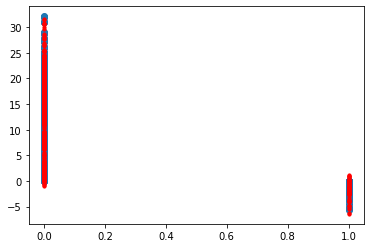

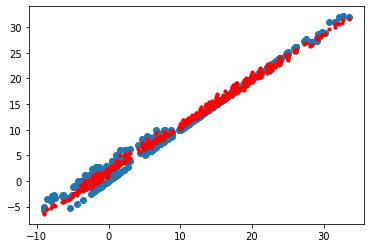

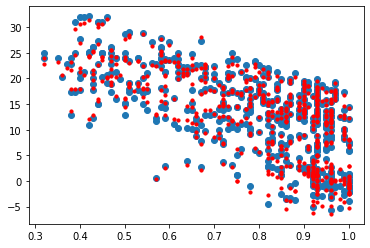

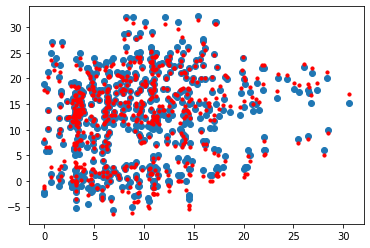

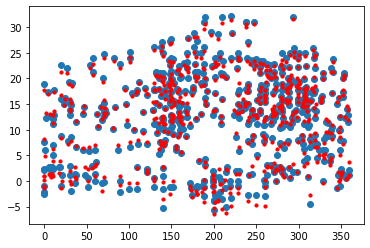

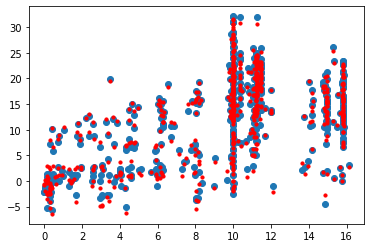

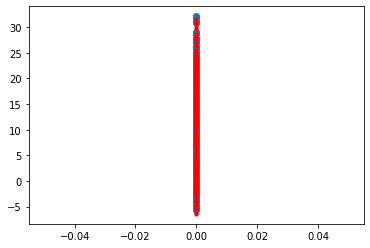

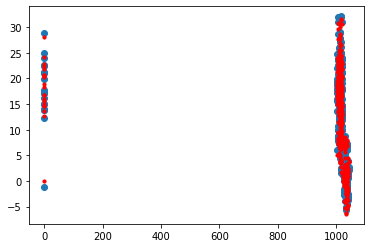

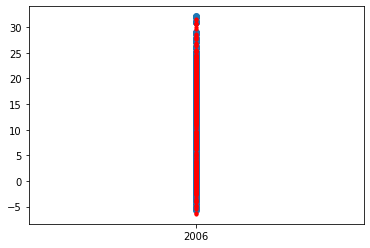

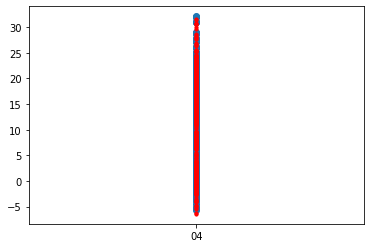

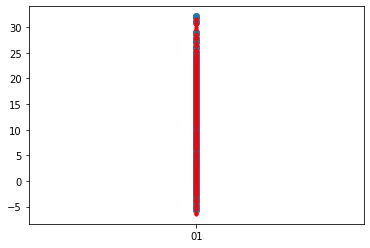

In [25]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

In [29]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.6393683062021704
Mean Squared Error: 0.599467513765504
R2 score: 0.9915606066290988


R2 > 0 значит разработанная мною модель работает лучше простого усреднения, однако MSE и MQE значительно больше 0, значит можно придумать работающий точнее.
Самые важные признаки - Precip Type и apparetion temperature, этот вывод я сделал, потому что их коэффициенты по модулю максимальны
